In [11]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt b


SyntaxError: invalid syntax (2583463588.py, line 3)

In [33]:
IMAGE_SIZE = 256 
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [18]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [19]:
class_names = dataset.class_names

In [20]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [21]:
len(dataset)

68

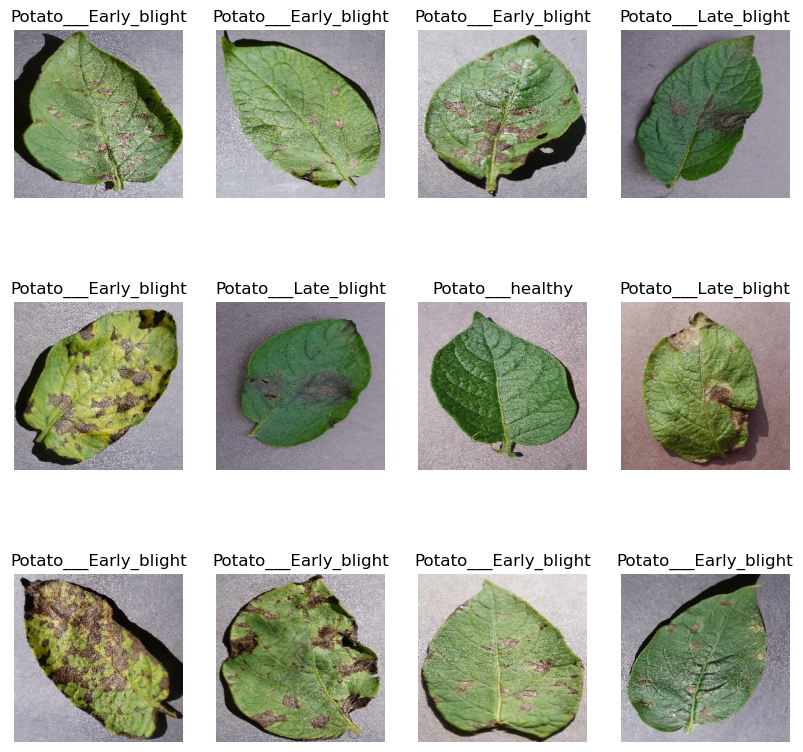

In [32]:
plt.figure(figsize=(10, 10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [34]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [35]:
train_ds = dataset.take(54)
len(train_ds)

54

In [52]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [53]:
val_size = 0.1 
len(dataset)*val_size

6.800000000000001

In [54]:
val_ds  = test_ds.take(6)
len(val_ds)

6

In [55]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [56]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [57]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [58]:
len(train_ds)

54

In [59]:
len(val_ds)

6

In [60]:
len(test_ds)

8

In [61]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [63]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [64]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])